In [1]:
import pandas as pd
import numpy as np
import statistics as stats # estadística
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
#cargamos la data desde nuestra PC- OJO: EN ESCRITORIO
from google.colab import files
files.upload()

Saving 6&7_oil_prod.csv to 6&7_oil_prod (1).csv


{'6&7_oil_prod (1).csv': b'date;oil_prod\r\nene-17;2014.263\r\nfeb-17;2010.48\r\nmar-17;2012.318\r\nabr-17;2006.29\r\nmay-17;2014.592\r\njun-17;2002.928\r\njul-17;1980.993\r\nago-17;1925.762\r\nsep-17;1726.184\r\noct-17;1897.593\r\nnov-17;1862.545\r\ndic-17;1870.98\r\nene-18;1905.292\r\nfeb-18;1872.75\r\nmar-18;1842.53\r\nabr-18;1864.581\r\nmay-18;1845.611\r\njun-18;1824.783\r\njul-18;1819.863\r\nago-18;1795.577\r\nsep-18;1804.635\r\noct-18;1744.339\r\nnov-18;1694.303\r\ndic-18;1707.488\r\nene-19;1619.916\r\nfeb-19;1697.24\r\nmar-19;1685.793\r\nabr-19;1670.981\r\nmay-19;1657.39\r\njun-19;1665.056\r\njul-19;1674.949\r\nago-19;1689.238\r\nsep-19;1711.052\r\noct-19;1661.444\r\nnov-19;1704.075\r\ndic-19;1711.793\r\nene-20;1724.241\r\nfeb-20;1729.248\r\nmar-20;1746.808\r\nabr-20;1709.22\r\nmay-20;1642.217\r\njun-20;1616.146\r\njul-20;1604.651\r\nago-20;1633.743\r\nsep-20;1644.136\r\noct-20;1627.087\r\nnov-20;1632.728\r\ndic-20;1648.942\r\nene-21;1648.548\r\nfeb-21;1666.486\r\nmar-21;1698.17

In [3]:
#levantamos la data con pandas
df = pd.read_csv("/content/6&7_oil_prod.csv",  encoding="latin-1", delimiter=";")
df.head(10)

,date,oil_prod
0,ene-17,2014.263
1,feb-17,2010.480
2,mar-17,2012.318
3,abr-17,2006.290
4,may-17,2014.592
5,jun-17,2002.928
6,jul-17,1980.993
7,ago-17,1925.762
8,sep-17,1726.184
9,oct-17,1897.593


In [ ]:
# Upload from DRIVE.
# Show google drive Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Berify the rute of Google Drive
file_path ='/content/drive/My Drive/INTRO_ECONOMETRIA/6&7_oil_prod.csv'

# Upload CSV  as DataFrame of pandas
df = pd.read_csv('/content/drive/My Drive/INTRO_ECONOMETRIA/6&7_oil_prod.csv', encoding="latin-1", delimiter=";")

# Show rows of DataFrame
df.head(10)

MessageError: Error: credential propagation was unsuccessful

**Time serie of oil production in Mexico from january 2017 to april 2024**

**1) STEP ONE: DECLARE TIME SERIES AND CLEAN IT**

In [4]:
#Create a dictionary to map the months
months = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr',
    'may': 'May', 'jun': 'Jun', 'jul': 'Jul', 'ago': 'Aug',
    'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Replace the spanish months to english
df['date'] = df['date'].str[:3].map(months) + df['date'].str[3:]

# turn date to datetime
df['date'] = pd.to_datetime(df['date'], format='%b-%y')

# Set date to index
df.set_index('date', inplace=True)
df.head()

,oil_prod
date,
2017-01-01,2014.263
2017-02-01,2010.480
2017-03-01,2012.318
2017-04-01,2006.290
2017-05-01,2014.592


In [23]:
# Select production column as "time serie", it is very important that declare it !!!!
ts = df['oil_prod']

In [6]:
df['oil_prod'].describe()

count      88.000000
mean     1713.445489
std       117.961514
min      1559.430000
25%      1633.818000
50%      1666.562000
75%      1733.020750
max      2014.592000
Name: oil_prod, dtype: float64

In [7]:
df.isnull().sum()

oil_prod    1
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df.isnull().sum()

oil_prod    0
dtype: int64

**Step 2) VISUALIZE OIL PRODUCTION DATA TO SEE TREND AND SEASONAL (Thousand barrels per day)**

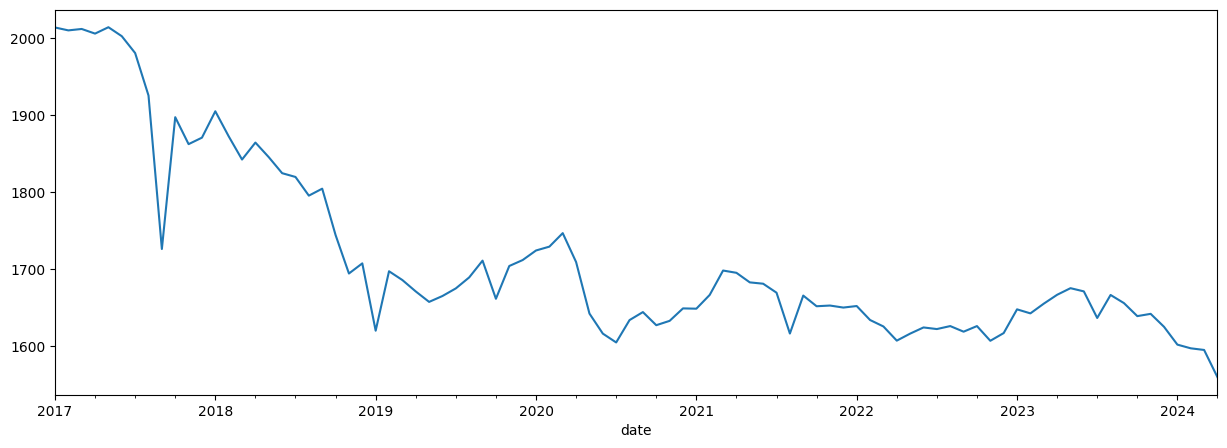

In [10]:
#Plot oil production
plt.figure(figsize = (15,5))
df['oil_prod'].plot();

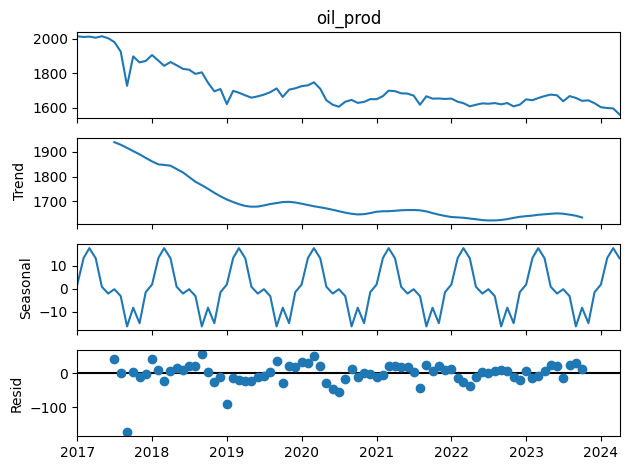

In [11]:
#Plot variable, Trend, Seasonal and Resid
dec = sm.tsa.seasonal_decompose(df['oil_prod'],period = 12,model = 'additive').plot()
plt.show()

**3) CHECK STATIONARITY**

We will use the Augmented Dickey-Fuller (ADF) test to check if the series is stationary.

Stationarity is a concept for time series where statistical parameters like mean, variance, etc are all constant over time.

**If the time series is not stationary, then the predictions deviate from the original values and increase the error.**

Thus, by making time series stationary, we kind of nullify the effects of statistical parameters on the forecast.


When the Test statistic is lower than crfitical value, the serie is stationary. P-value also should be lower than 0.05 to be stationary.

In [12]:
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.392208
p-value                         0.143948
#Lags Used                      1.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64


So, the oil production serie is non stationary :-(


**4 CALCULATE AND VISUALIZE ACF (Autocorrelation function) & PARF (Partial autocorrelation function)**

We can see that:

MA(q)- ACF (nearly zero)= 22 or 23 lags

AR (p)-PACF (blue area- below the threshold)= 10



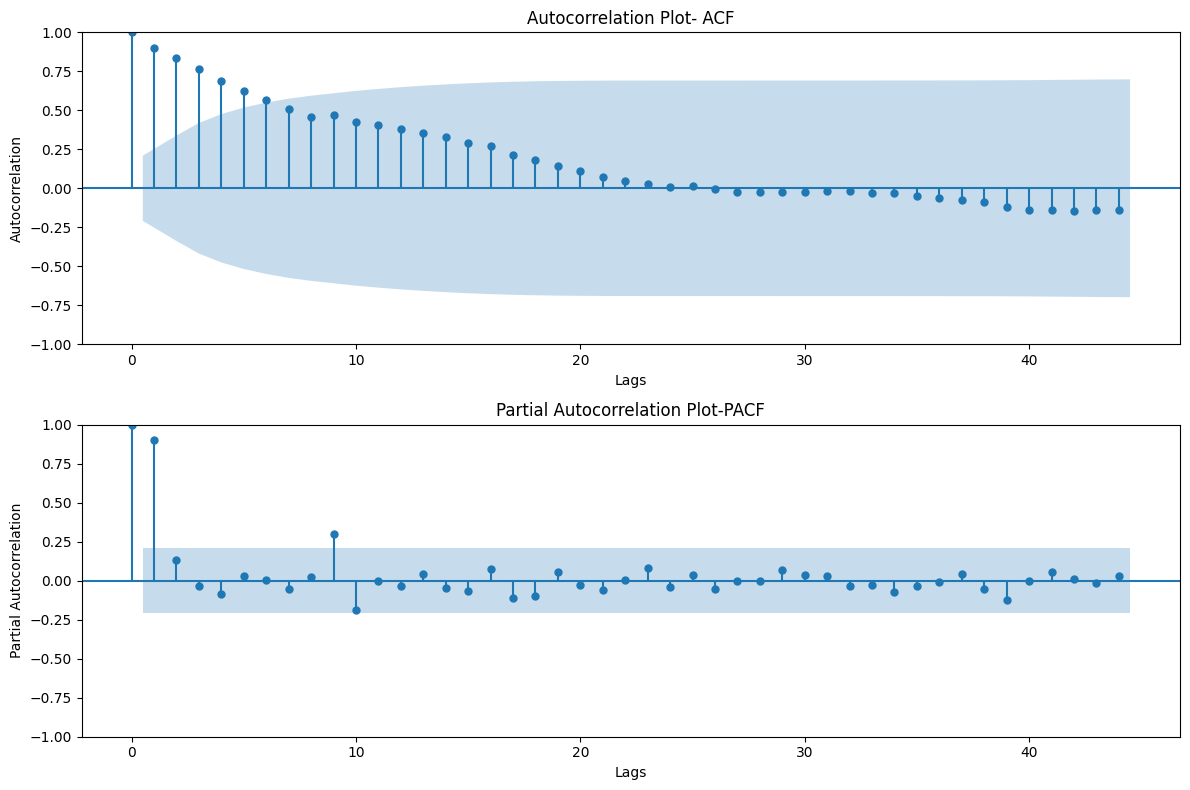

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select column
production= df['oil_prod']

# Create subgraph figures
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot autocorrelation (MA(ACF))
plot_acf(production, ax=axes[0], lags=44)
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].set_title('Autocorrelation Plot- ACF')

# Plot partial autocorrelation (AR(PACF))
plot_pacf(production, ax=axes[1], lags=44)
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].set_title('Partial Autocorrelation Plot-PACF')

# Adjust spaces
plt.tight_layout()

# Show figure
plt.show()


Let's suppose our time serie is "STATIONARY", It passes Dickey Fuller test.

However, we know it is not true. We would use **A R M A** where (d)=0

It is not a good option.


In [14]:
# ARMA , d=0 = BAD MODEL SINCE WE KNOW IT IS NOT STATIONARY
arma_model = ARIMA(ts, order=(10, 0, 22))
arma_fit = arma_model.fit()

# ARMA
print(arma_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:               oil_prod   No. Observations:                   89
Model:               ARIMA(10, 0, 22)   Log Likelihood                -489.441
Date:                Fri, 12 Jul 2024   AIC                           1046.883
Time:                        18:43:21   BIC                           1131.496
Sample:                             0   HQIC                          1080.988
                                 - 89                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1713.4749    246.762      6.944      0.000    1229.830    2197.120
ar.L1         -0.6455    681.765     -0.001      0.999   -1336.881    1335.590
ar.L2          0.2996    583.464      0.001      1.0

In [15]:
# Forecast
arma_forecast = arma_fit.forecast(steps=10)
print(arma_forecast)

89    1595.835017
90    1614.141873
91    1632.928872
92    1638.038539
93    1643.405760
94    1654.190294
95    1669.943716
96    1680.370162
97    1691.459801
98    1702.891957
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5) Calculate **ARIMA**:  We have already seen that "oil_prod" is not an stationary serie, so will will have to use a differenciation (d) and use ARIMA. The question is have many differenciations do we need ? **We need to apply Dickey Fuller test again**

**If we can see, one differenciation is enough (d(1)) since Pvalue <0.05**, it is **1.9908905264242933e-23 = 0.000000000000000000000019908**

In [16]:
from statsmodels.tsa.stattools import adfuller

# Function to apply adfuller
def adf_test(df):
    result = adfuller(df)
    print('Estadístico ADF:', result[0])
    print('Valor p:', result[1])
    print('Valores Críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# First differenciation
ts_diff1 = ts.diff().dropna()
print("\nPrueba ADF para la primera diferenciación:")
adf_test(ts_diff1)

# Second sifferenciation
ts_diff2 = ts_diff1.diff().dropna()
print("\nPrueba ADF para la segunda diferenciación:")
adf_test(ts_diff2)


Prueba ADF para la primera diferenciación:
Estadístico ADF: -12.572399963324042
Valor p: 1.9908905264242933e-23
Valores Críticos:
   1%: -3.5087828609430614
   5%: -2.895783561573195
   10%: -2.5850381719848565

Prueba ADF para la segunda diferenciación:
Estadístico ADF: -7.219143143148672
Valor p: 2.1339531950754756e-10
Valores Críticos:
   1%: -3.5148692050781247
   5%: -2.8984085156250003
   10%: -2.58643890625


In [17]:
# Let's try ARIMA model (pdq)
arima_model = ARIMA(ts, order=(10, 1, 22))
arima_fit = arima_model.fit()

# Summary
print(arima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:               oil_prod   No. Observations:                   89
Model:               ARIMA(10, 1, 22)   Log Likelihood                -421.981
Date:                Fri, 12 Jul 2024   AIC                            909.961
Time:                        18:45:35   BIC                            991.714
Sample:                             0   HQIC                           942.897
                                 - 89                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1366      1.843     -0.074      0.941      -3.749       3.476
ar.L2          0.2274      1.147      0.198      0.843      -2.020       2.475
ar.L3          0.0928      0.926      0.100      0.9

Let's read the results of the coefficients:

**ar-L1=-0.1193** (An increase in the value of the previous period is associated with a decrease in the current value by approximately 0.1193 units).

**ar-L2= 0.25** (An increase in the value from two periods ago is associated with an increase in the current value by approximately 0.25 units).

**ma.L1=-0.069** (A positive error in the last period reduces the current value of the series by approximately 0.069 units.

**ma.L2=0.0108** (A positive error two periods ago increases the current value of the series by approximately 0.0108 units.)

**sigma2**= This value represents the variance of the model residuals. It is a measure of the amount of variability in the errors not explained by the model


In [20]:
# Forecast
arima_forecast = arima_fit.forecast(steps=10)
print(arima_forecast)

89    1581.952088
90    1604.056461
91    1594.820714
92    1589.823858
93    1616.573699
94    1591.154922
95    1604.894682
96    1598.950660
97    1594.662941
98    1592.701151
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [25]:
# Select production column as "time serie", it is very important that declare it !!!!
ts = df['oil_prod']

**Visualization of forecast**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


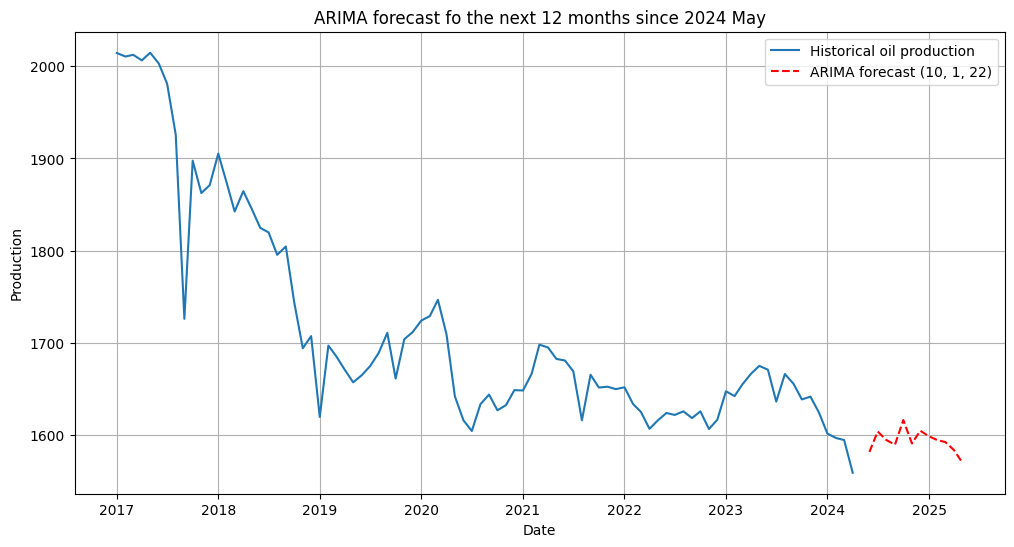

In [26]:
# Forecast for the next 12 months from May 2024
forecast_steps = 12
arima_forecast = arima_fit.forecast(steps=forecast_steps)

# Extend the index to include the next 12 months
# The latest date of historical data is April 2024
last_date = ts.index[-1]
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# View the original time series and forecasts
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Historical oil production')

# Add the forecast to the chart
plt.plot(forecast_index, arima_forecast, label='ARIMA forecast (10, 1, 22)', linestyle='--', color='red')

# Chart Settings
plt.title('ARIMA forecast fo the next 12 months since 2024 May')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

**SARIMA MODEL: CORRECTS SEASONAL EFFECTS**

SEE SEASONAL EFFECTS: We did it above

In [27]:
#JUST IN CASE YOU NEED TO PLOT AGAIN THE DECOMPOSITION: VARIABLE, TREND, SEASONAL AND RESID !
#TO SEE SEASONAL !!
#from pylab import rcParams
#import statsmodels.api as sm
#rcParams['figure.figsize'] = 20, 10
#decomposition = sm.tsa.seasonal_decompose(df.oil_prod, model='additive') # additive seasonal index
#fig = decomposition.plot()
#plt.show()

In [28]:
# Adjust SARIMA , Be careful: MA order (22 is too high for a SARIMA), we have to  from 22 to 11, because it was creating a conflict between the moving average (MA) components in the seasonal and non-seasonal parts of your SARIMA model. Specifically, the lag 12 is used in both components, which is not allowed.
serie_temporal = df['oil_prod']
model_SARIMA = sm.tsa.SARIMAX(serie_temporal, order=(10, 1, 11), seasonal_order=(2, 1, 5, 12))

# Train the model
resultado = model_SARIMA.fit(disp=False)

# See results
print(resultado.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: C

                                             SARIMAX Results                                              
Dep. Variable:                                           oil_prod   No. Observations:                   88
Model:             SARIMAX(10, 1, 11)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -382.812
Date:                                            Fri, 12 Jul 2024   AIC                            823.625
Time:                                                    19:00:48   BIC                            890.832
Sample:                                                01-01-2017   HQIC                           850.460
                                                     - 04-01-2024                                         
Covariance Type:                                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [26]:
#Predict next 12 months
SARIMA_pred = resultado.get_forecast(steps=12)

# Print the forecasted values
print("Forecasted Values:")
print(SARIMA_pred.predicted_mean)


Forecasted Values:
2024-05-01    1552.322947
2024-06-01    1532.656683
2024-07-01    1555.570512
2024-08-01    1535.080353
2024-09-01    1494.187331
2024-10-01    1527.023508
2024-11-01    1522.858929
2024-12-01    1538.583391
2025-01-01    1530.107035
2025-02-01    1541.565934
2025-03-01    1548.516098
2025-04-01    1545.888883
Freq: MS, Name: predicted_mean, dtype: float64


            lower oil_prod  upper oil_prod
2024-05-01     1491.563047     1613.082846
2024-06-01     1458.430030     1606.883336
2024-07-01     1471.779207     1639.361817
2024-08-01     1441.655759     1628.504947
2024-09-01     1392.559734     1595.814928
2024-10-01     1417.107165     1636.939850
2024-11-01     1398.194903     1647.522954
2024-12-01     1403.464591     1673.702192
2025-01-01     1384.972080     1675.241991
2025-02-01     1384.238674     1698.893194
2025-03-01     1387.988607     1709.043589
2025-04-01     1380.110563     1711.667202


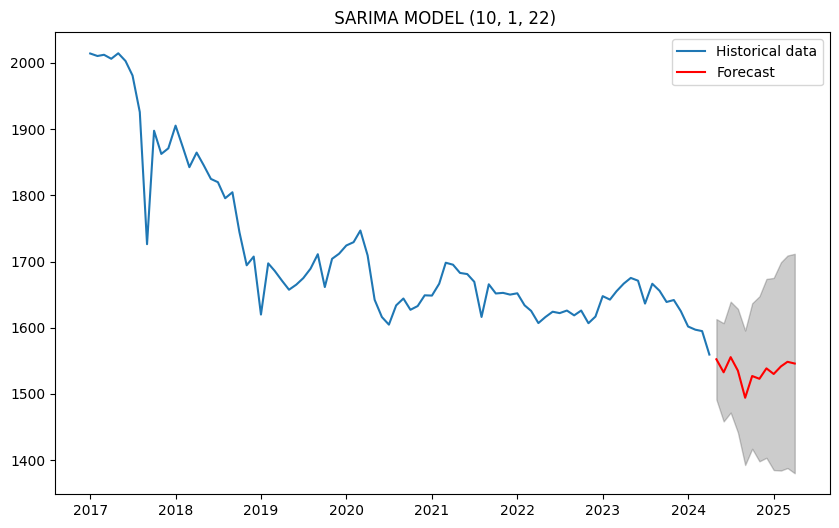

In [27]:
#Visualize and predict with conficence intervals
SARIMA_pred = resultado.get_forecast(steps=12) #predict next 12 months
ic = SARIMA_pred.conf_int()
print(SARIMA_pred)
print(ic)

# Visualize
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal, label='Historical data')
plt.plot(SARIMA_pred.predicted_mean, label='Forecast', color='red')
plt.fill_between(ic.index, ic.iloc[:, 0], ic.iloc[:, 1], color='k', alpha=0.2)
plt.legend(loc='best')
plt.title(' SARIMA MODEL (10, 1, 22)')
plt.show()


Finally, to know which model is the best, use "AKAIKE CRITERION" (AIC) and "Bayesian Information Criterion" (BIC). For ARMA, ARIMA AND SARIMA, we do not measure R2, but AIC and BIC The lowest AIC and BIC best balances the complexity (number of parameters) and the goodness of fit to the data.

Comparing ARIMA vs SARIMA.

**SARIMA is a better model since it turned "oil_prod" into a stationary variable, while eliminating seasonal effects. Also because AIC and BIC in SARIMA model are lower than ARMA and ARIMA.**

**Comparing AIC &BIC**: **CHOOSE THE LOWEST AIC AND BIC**

In [31]:
p_arma, q_arma = 10, 22
p_arima, d_arima, q_arima = 10, 1, 22
p_sarima, d_sarima, q_sarima, P_sarima, D_sarima, Q_sarima, s_sarima = 10, 1, 11, 2, 1, 5, 12
2
# Fit ARMA model
arma_model = sm.tsa.SARIMAX(serie_temporal, order=(p_arma, 0, q_arma)).fit(disp=False)
arma_aic = arma_model.aic
arma_bic = arma_model.bic

# Fit ARIMA model
arima_model = sm.tsa.SARIMAX(serie_temporal, order=(p_arima, d_arima, q_arima)).fit(disp=False)
arima_aic = arima_model.aic
arima_bic = arima_model.bic

# Fit SARIMA model
model_SARIMA = sm.tsa.SARIMAX(serie_temporal, order=(p_sarima, d_sarima, q_sarima),
                              seasonal_order=(P_sarima, D_sarima, Q_sarima, s_sarima)).fit(disp=False)
sarima_aic = model_SARIMA.aic
sarima_bic = model_SARIMA.bic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferr

In [29]:
# Print AIC and BIC for each model
print("ARMA Model:")
print(f"AIC: {arma_aic}")
print(f"BIC: {arma_bic}\n")

print("ARIMA Model:")
print(f"AIC: {arima_aic}")
print(f"BIC: {arima_bic}\n")

print("SARIMA_Model:")
print(f"AIC: {sarima_aic}")
print(f"BIC: {sarima_bic}\n")

# Summary comparison
comparison = pd.DataFrame({
    'Model': ['ARMA', 'ARIMA', 'SARIMA'],
    'AIC': [arma_aic, arima_aic, sarima_aic],
    'BIC': [arma_bic, arima_bic, sarima_bic]
})
print(comparison)

ARMA Model:
AIC: 1040.561796924912
BIC: 1122.313911802693

ARIMA Model:
AIC: 910.1184564529409
BIC: 991.4934243685422

SARIMA_Model:
AIC: 823.6245603461679
BIC: 890.8317156387209

    Model          AIC          BIC
0    ARMA  1040.561797  1122.313912
1   ARIMA   910.118456   991.493424
2  SARIMA   823.624560   890.831716


THE BEST MODEL IS SARIMA, SINCE AIC AND BIC HAVE THE LOWEST PARAMETERS OF COMPLEXITY